# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [ ]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [ ]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data,对数据进行分类，分别是训练：49000，验证：1000，测试：1000
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG方向直方图) as well as a color histogram（颜色直方图） using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.（两个特征联合起来）

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The `extract_features` (这三个都是现有的函数)
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [ ]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram 颜色直方图
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)] #hog_feature 和 color_histogram都是计算特征的函数
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature，按纵抽计算train的平均值，然后都-这个均值
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True) #计算train矩阵的标准差
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension，再加一列 1
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [14]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
pass
for rs in regularization_strengths:
    for lr in learning_rates:
        svm = LinearSVM()
        svm.train(X_train_feats, y_train, lr, rs, num_iters=6000)
        y_train_pred = svm.predict(X_train_feats)
        train_accuracy = np.mean(y_train_pred == y_train)
        y_val_pred = svm.predict(X_val_feats)
        val_accuracy = np.mean(y_val_pred == y_val)
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_svm = svm
        results[(lr,rs)] = train_accuracy, val_accuracy
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)
(200, 10)


In [15]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.424


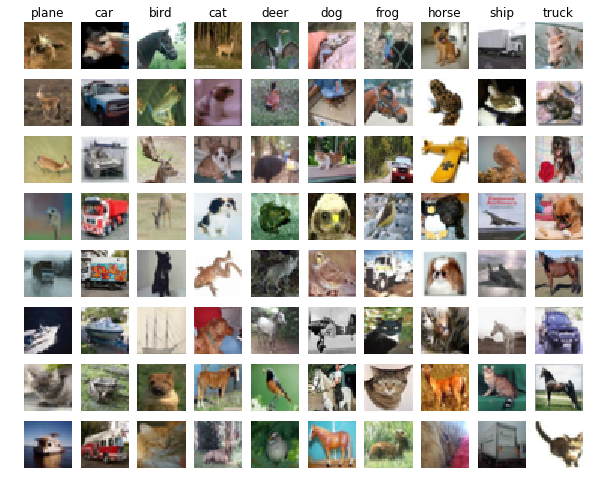

In [16]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".
# 显示分类错误的图片
examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0] #真实值和预测值都不对的
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

Since we are using The color histogram features and the HOG features for some misclassification results which have special background or outline, they do make sense. For example, the objects which have a blue background tend to be misclassified as plane and some dogs(trucks) tend be misclassified as cat(car).

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [17]:
print(X_train_feats.shape)

(49000, 155)


In [20]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
pass
results = {}
best_val = -1
best_net = None

learning_rates = [1e-2 ,1e-1, 5e-1, 1, 5]
regularization_strengths = [1e-3, 5e-3, 1e-2, 1e-1, 0.5, 1]

print ("begin train")
for lr in learning_rates:
    for reg in regularization_strengths:
        print ('.')
        net = TwoLayerNet(input_dim, hidden_dim, num_classes)
        # Train the network
        stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
        num_iters=1500, batch_size=200,
        learning_rate=lr, learning_rate_decay=0.95,
        reg= reg, verbose=False)
        val_acc = (net.predict(X_val_feats) == y_val).mean()
        if val_acc > best_val:
            best_val = val_acc
            best_net = net         
        results[(lr,reg)] = val_acc

# Print out results.
for lr, reg in sorted(results):
    val_acc = results[(lr, reg)]
    print ('lr %e reg %e val accuracy: %f' % (lr, reg,  val_acc))
    
print ('best validation accuracy achieved during cross-validation: %f' % best_val)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

begin train
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


/home/pennyliusev/assignment1/cs231n/classifiers/neural_net.py:109: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(softmax_output[range(N), list(y)]))


.
.
.
.


/home/pennyliusev/assignment1/cs231n/classifiers/neural_net.py:107: RuntimeWarning: overflow encountered in subtract
  shift_scores = scores - np.max(scores, axis = 1).reshape(-1,1)
/home/pennyliusev/assignment1/cs231n/classifiers/neural_net.py:107: RuntimeWarning: invalid value encountered in subtract
  shift_scores = scores - np.max(scores, axis = 1).reshape(-1,1)
/home/pennyliusev/assignment1/cs231n/classifiers/neural_net.py:132: RuntimeWarning: invalid value encountered in greater
  dh_Relu = ( hidden_output > 0 ) * dh


.
lr 1.000000e-02 reg 1.000000e-03 val accuracy: 0.219000
lr 1.000000e-02 reg 5.000000e-03 val accuracy: 0.222000
lr 1.000000e-02 reg 1.000000e-02 val accuracy: 0.128000
lr 1.000000e-02 reg 1.000000e-01 val accuracy: 0.078000
lr 1.000000e-02 reg 5.000000e-01 val accuracy: 0.098000
lr 1.000000e-02 reg 1.000000e+00 val accuracy: 0.107000
lr 1.000000e-01 reg 1.000000e-03 val accuracy: 0.521000
lr 1.000000e-01 reg 5.000000e-03 val accuracy: 0.519000
lr 1.000000e-01 reg 1.000000e-02 val accuracy: 0.520000
lr 1.000000e-01 reg 1.000000e-01 val accuracy: 0.416000
lr 1.000000e-01 reg 5.000000e-01 val accuracy: 0.102000
lr 1.000000e-01 reg 1.000000e+00 val accuracy: 0.079000
lr 5.000000e-01 reg 1.000000e-03 val accuracy: 0.569000
lr 5.000000e-01 reg 5.000000e-03 val accuracy: 0.575000
lr 5.000000e-01 reg 1.000000e-02 val accuracy: 0.538000
lr 5.000000e-01 reg 1.000000e-01 val accuracy: 0.380000
lr 5.000000e-01 reg 5.000000e-01 val accuracy: 0.105000
lr 5.000000e-01 reg 1.000000e+00 val accuracy:

In [21]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.103


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!